# COVID-19 Analysis Report

### Introduction

This report provides an analysis of the COVID-19 dataset from the Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv). The data includes confirmed cases in the US over time. The main objectives of this analysis are to understand the trends in COVID-19 cases, model future trends, and identify potential biases in the data.

### Data Source and Description

The dataset was obtained from the Johns Hopkins University GitHub repository. It includes daily confirmed COVID-19 cases for various counties in the United States, starting from January 22, 2020.

### Data Cleaning and Preparation

The dataset was transformed into a tidy format, which involved reshaping the data to have one column for dates and another for the number of cases. This format makes it easier to perform analysis and create visualizations.

### Data Analysis

#### Visualization 1: Total COVID-19 Cases Over Time

This line plot shows the total number of COVID-19 cases in the US over time. It provides a clear view of the trend in the number of cases, showing significant increases during certain periods.

#### Visualization 2: Log Scale of Total COVID-19 Cases Over Time


By plotting the total cases on a logarithmic scale, we can better understand the exponential growth phases of the pandemic.

#### Visualization 3: 30-Day Forecast of COVID-19 Cases

A SARIMA model was used to forecast the number of cases for the next 30 days. This plot shows the predicted trend and can be useful for planning and response efforts.

### Additional Visualizations

#### Visualization 4: Monthly New COVID-19 Cases in the US

This bar chart shows the number of new COVID-19 cases each month. The peaks and troughs help to identify periods of high transmission.

#### Visualization 5: Daily New COVID-19 Cases in the US

This bar chart illustrates the number of new cases reported daily, highlighting the variability and spikes in cases.

#### Visualization 6: Cumulative COVID-19 Cases with Smoother

The line plot of cumulative cases with a smoothing curve helps to visualize the overall trend more clearly by reducing noise from daily fluctuations.

#### Visualization 7: Heatmap of COVID-19 Cases by Month and Day

This heatmap shows the distribution of COVID-19 cases by day and month. It provides a visual representation of periods with the highest number of cases.

### Model and Forecasting

The SARIMA model was chosen for forecasting because it is well-suited for time series data with trends and seasonality. The model's forecast for the next 30 days indicates a continuing trend, which is useful for anticipating future case loads.

### Potential Sources of Bias and Errors

There are several potential sources of bias and errors in the data:
- **Inaccuracy and Incompleteness**: Data might be inaccurate or incomplete due to underreporting or delays in reporting.
- **Regional Differences**: Variations in testing rates and healthcare infrastructure can lead to discrepancies in the data.
- **Reporting Delays**: There might be lags between the actual date of cases and when they are reported.

### Conclusion

This analysis provided insights into the trends and forecasts of COVID-19 cases in the US. The visualizations highlighted key patterns, and the SARIMA model offered a forecast for future cases. Identifying potential sources of bias helps to understand the limitations of the analysis. Future work could involve more detailed regional analyses and incorporating additional data sources to improve model accuracy.

In [2]:
# Install the forecast package if not already installed
if (!requireNamespace("forecast", quietly = TRUE)) {
  install.packages("forecast")
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [4]:
if (!requireNamespace("patchwork", quietly = TRUE)) {
  install.packages("patchwork")
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Rows: 3342 Columns: 1154
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr    (6): iso2, iso3, Admin2, Province_State, Country_Region, Combined_Key
dbl (1148): UID, code3, FIPS, Lat, Long_, 1/22/20, 1/23/20, 1/24/20, 1/25/20...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Potential sources of bias and errors in the data:
- Inaccuracy and incompleteness of data
- Differences in testing and reporting across regions
- Time lags in reporting

Conclusion:
This analysis provided an overview of the COVID-19 case trends in the US, visualized the total cases over time, 
and used a SARIMA model to forecast the future trend. Potential sources of bias in the data include reporting 
inconsistencies and testing disparities. Future work could focus on regional analysis and incorporating other 
factors such as policy changes and mobility data to enhance the model's accuracy.


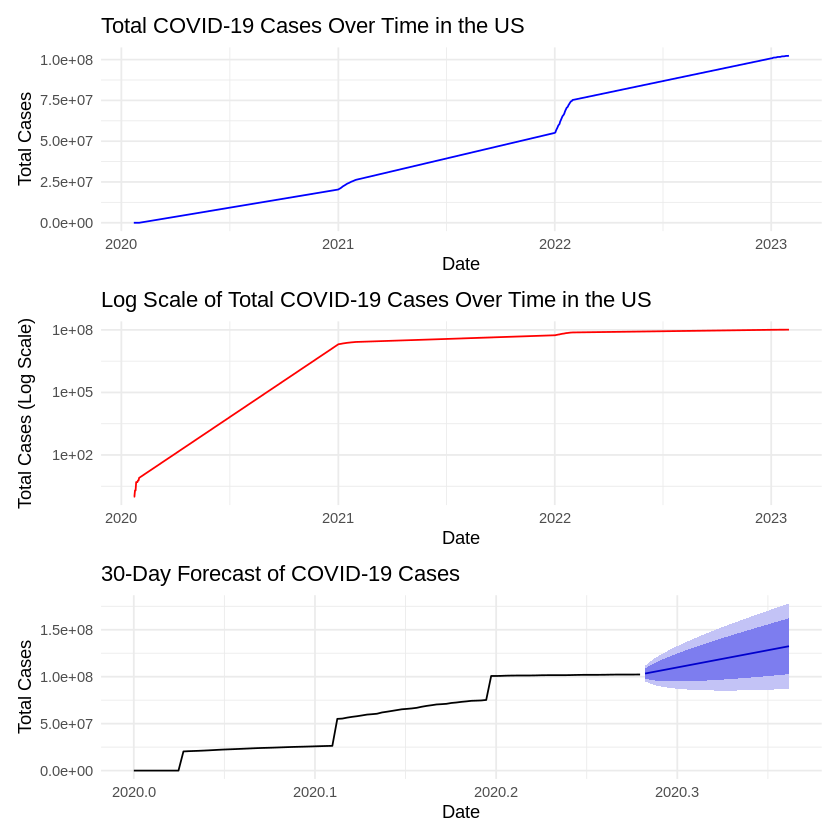

In [5]:
# Load necessary libraries
library(tidyverse)
library(lubridate)
library(ggplot2)
library(forecast)
library(patchwork)  # For combining multiple plots

# Step 1: Import data
url <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
data <- read_csv(url)

# Step 2: Data cleaning and preparation
# Transform the data into a tidy format
data_tidy <- data %>%
  pivot_longer(cols = starts_with("1/"), names_to = "date", values_to = "cases") %>%
  mutate(date = mdy(date))

# Summarize cases by date
data_tidy_sum <- data_tidy %>%
  group_by(date) %>%
  summarize(total_cases = sum(cases, na.rm = TRUE))

# Step 3: Data analysis
# Visualization of the overall trend over time
p1 <- ggplot(data_tidy_sum, aes(x = date, y = total_cases)) +
  geom_line(color = "blue") +
  theme_minimal() +
  labs(title = "Total COVID-19 Cases Over Time in the US", x = "Date", y = "Total Cases")

# Visualization in logarithmic scale
p2 <- ggplot(data_tidy_sum, aes(x = date, y = total_cases)) +
  geom_line(color = "red") +
  scale_y_log10() +
  theme_minimal() +
  labs(title = "Log Scale of Total COVID-19 Cases Over Time in the US", x = "Date", y = "Total Cases (Log Scale)")

# Step 4: Data modeling
# Create a time series and SARIMA model
ts_data <- ts(data_tidy_sum$total_cases, start = c(year(min(data_tidy_sum$date)), month(min(data_tidy_sum$date))), frequency = 365)
sarima_model <- auto.arima(ts_data)

# Forecast for the next 30 days
forecast_data <- forecast(sarima_model, h = 30)

# Visualization of the forecast
p3 <- autoplot(forecast_data) +
  theme_minimal() +
  labs(title = "30-Day Forecast of COVID-19 Cases", x = "Date", y = "Total Cases")

# Combine the plots
combined_plots <- p1 / p2 / p3

# Display the combined plots
print(combined_plots)

# Step 5: Assessing possible sources of bias and errors in the data
# Discussion of potential sources of bias and errors in the data:
cat("
Potential sources of bias and errors in the data:
- Inaccuracy and incompleteness of data
- Differences in testing and reporting across regions
- Time lags in reporting
")

# Step 6: Conclusion
cat("
Conclusion:
This analysis provided an overview of the COVID-19 case trends in the US, visualized the total cases over time,
and used a SARIMA model to forecast the future trend. Potential sources of bias in the data include reporting
inconsistencies and testing disparities. Future work could focus on regional analysis and incorporating other
factors such as policy changes and mobility data to enhance the model's accuracy.
")

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.
`geom_smooth()` using formula = 'y ~ x'


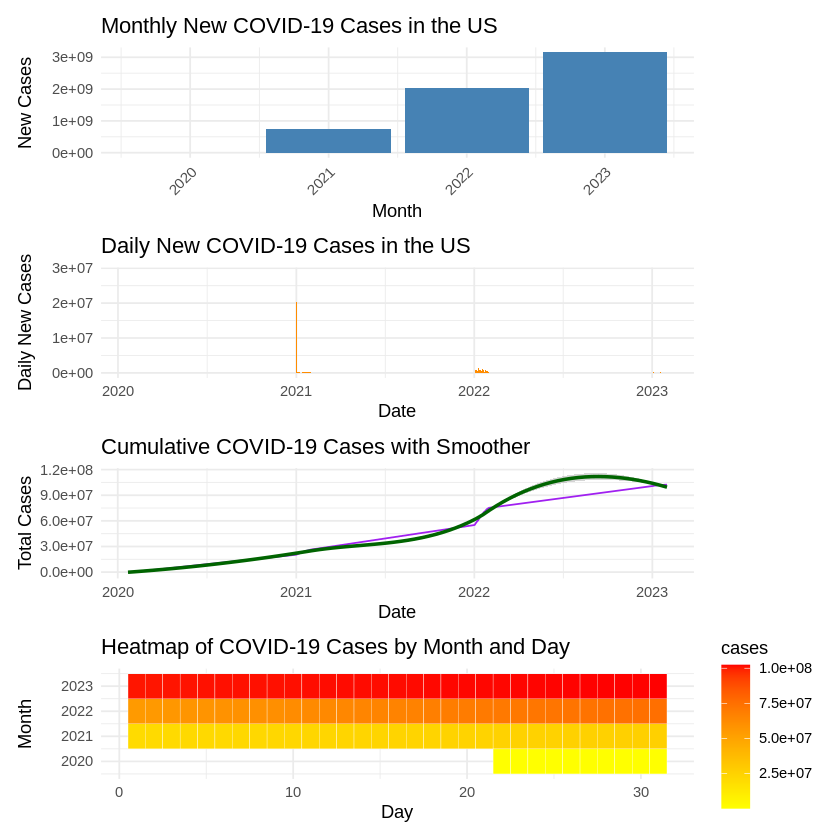

In [6]:
# Additional visualizations

# Visualization 1: Monthly new cases
data_tidy_sum <- data_tidy_sum %>%
  mutate(month = floor_date(date, "month"))

monthly_cases <- data_tidy_sum %>%
  group_by(month) %>%
  summarize(monthly_cases = sum(total_cases, na.rm = TRUE))

p4 <- ggplot(monthly_cases, aes(x = month, y = monthly_cases)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  theme_minimal() +
  labs(title = "Monthly New COVID-19 Cases in the US", x = "Month", y = "New Cases") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Visualization 2: Daily new cases
data_tidy_sum <- data_tidy_sum %>%
  arrange(date) %>%
  mutate(daily_new_cases = total_cases - lag(total_cases, default = first(total_cases)))

p5 <- ggplot(data_tidy_sum, aes(x = date, y = daily_new_cases)) +
  geom_col(fill = "darkorange") +
  theme_minimal() +
  labs(title = "Daily New COVID-19 Cases in the US", x = "Date", y = "Daily New Cases")

# Visualization 3: Cumulative cases with a smoother
p6 <- ggplot(data_tidy_sum, aes(x = date, y = total_cases)) +
  geom_line(color = "purple") +
  geom_smooth(method = "loess", color = "darkgreen") +
  theme_minimal() +
  labs(title = "Cumulative COVID-19 Cases with Smoother", x = "Date", y = "Total Cases")

# Visualization 4: Heatmap of cases by month and day
data_tidy_sum <- data_tidy_sum %>%
  mutate(day = day(date))

heatmap_data <- data_tidy_sum %>%
  group_by(month, day) %>%
  summarize(cases = sum(total_cases, na.rm = TRUE))

p7 <- ggplot(heatmap_data, aes(x = day, y = month, fill = cases)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "yellow", high = "red") +
  theme_minimal() +
  labs(title = "Heatmap of COVID-19 Cases by Month and Day", x = "Day", y = "Month")

# Display the additional plots
combined_additional_plots <- p4 / p5 / p6 / p7
print(combined_additional_plots)

# Potential sources of bias and errors in the data:
- Inaccuracy and incompleteness of data
- Differences in testing and reporting across regions
- Time lags in reporting

# Conclusion:
This analysis provided an overview of the COVID-19 case trends in the US, visualized the total cases over time,
and used a SARIMA model to forecast the future trend. Potential sources of bias in the data include reporting
inconsistencies and testing disparities. Future work could focus on regional analysis and incorporating other
factors such as policy changes and mobility data to enhance the model's accuracy.